
# 27 May 2022
----
# Description:
Tasks include implementing a neural network from first principles and exploring use of different activation functions and different network architectures. 
## 1.2 Grading:
Grading for implementation will be based on the following exercises:
1. Basic implementation of neural network trained using back-propagation 
  - Provide clear comments for each sections/phases of your code. eg: If your are initializing
the network weights between [0,1] clearly state it in your comments.
2. Exploring the effect of different activation functions (eg. linear, sigmoid, tanh and ReLU)
  - You are required to implement at least two activation functions and provide visualizations
to help understand their impact/use.
3. Exploring the effect of network size on generalizability (eg. number of hidden layers, number of hidden neurons)
  - You are required to explore at least two options (eg. two hidden layers vs one hidden
layer, x neurons vs y neurons in the hidden layer/layers.
4. Effective use of data visualization and analysis of the results to understand the working
of algorithm and other steps
  - This is applicable to all the above stages. eg. learning curves, no. of hidden layers/neurons vs convergence, activation functions etc.

# Neural Network 
A neural network is a type of machine learning algorithm modeled on human brains and nervous system.
The model is believed to process information in a similar way to the human brain:
- inputs and weights as the dendrites
-neuron operations of weighted sums and activation as neurons
-outputs as axons

A neural network often consists of a large number of elements, known as nodes, working in parallel to solve a specific problem. These nodes are often organized into different layers.
Each layer of the network transforms the input values into the output values based on the weights (parameters) of the nodes.
The data transformation from the input to the output is in general referred to as forward propagation of the network.

**An example of a neural network can be seen in the image below. It has one input, two hidden and one output layer**


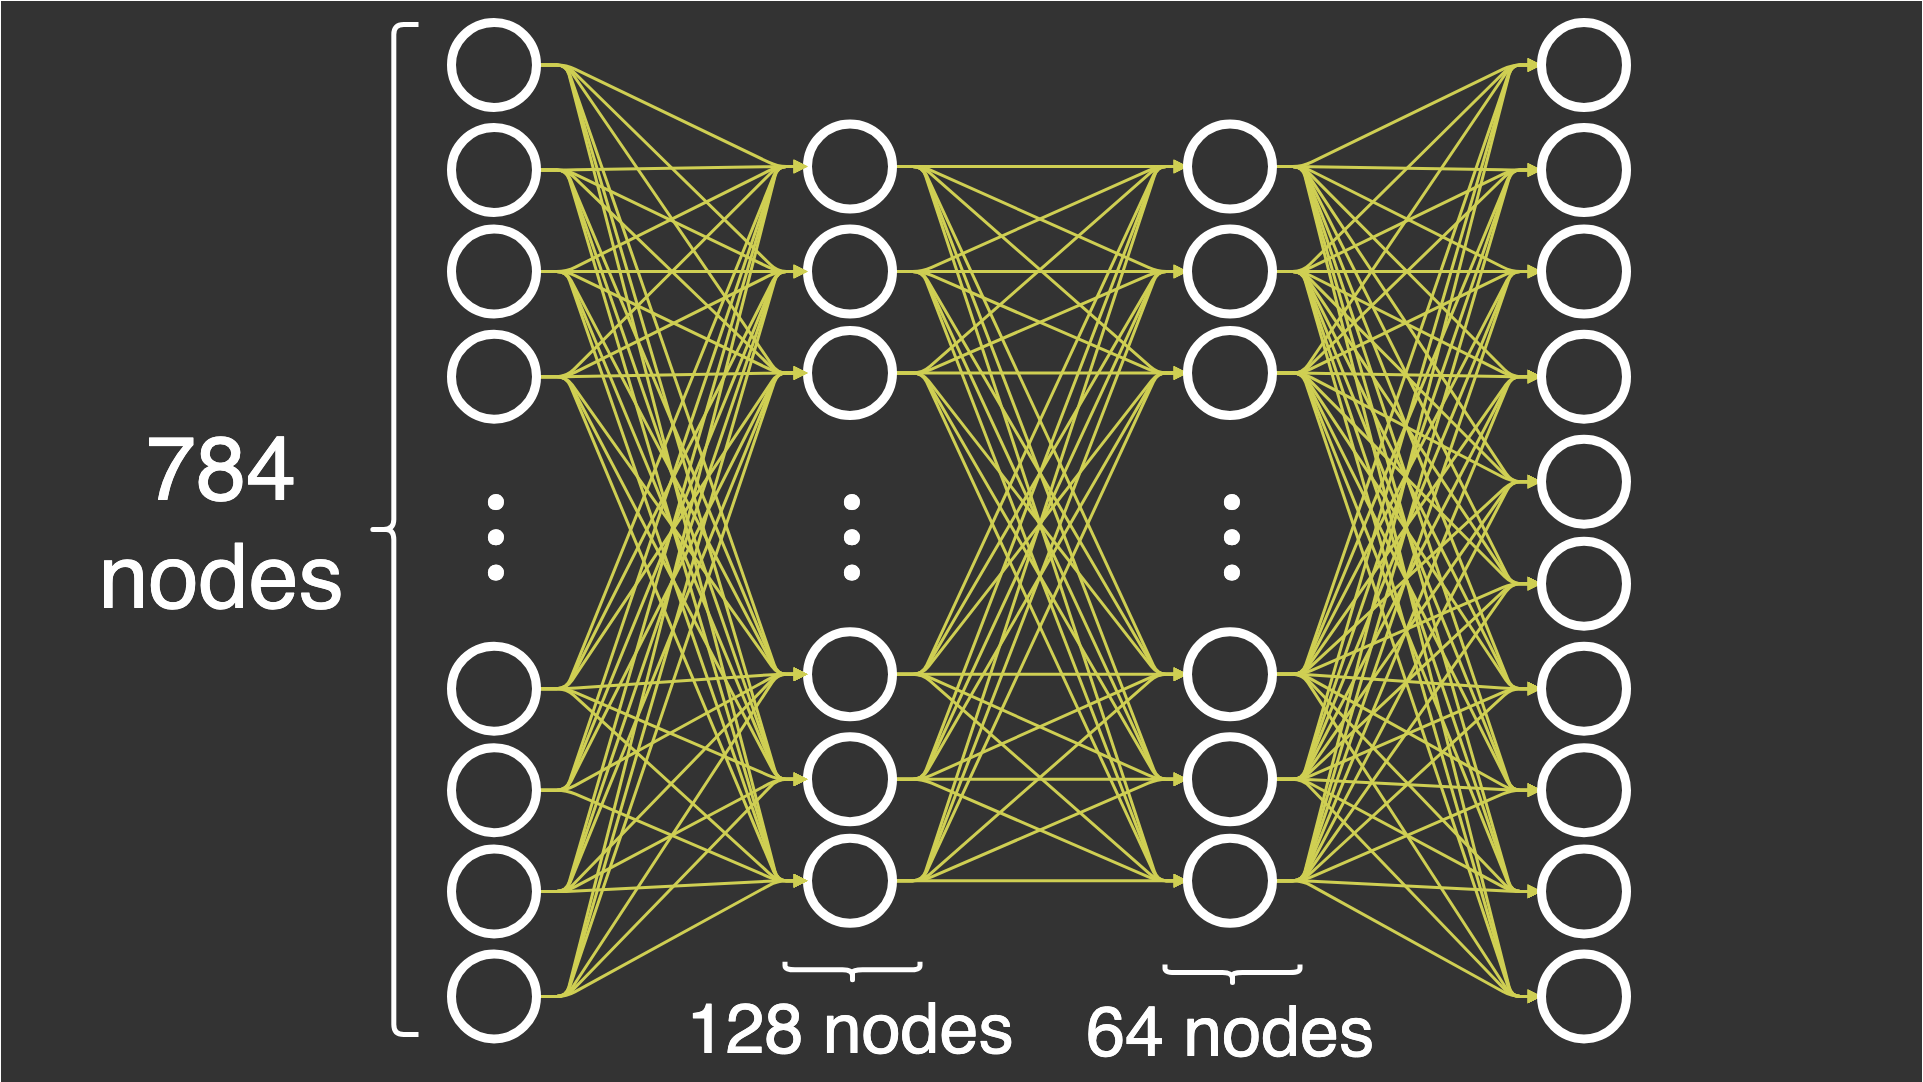

## Import necessary libraries

In [33]:
import numpy as np #for neural network creation
import matplotlib.pyplot as plt #for plotting
import h5py #for our dataset
from sklearn.metrics import accuracy_score #determining accuract of model

For this assignment, I will be creating a neural network with fully connected layers, i.e. each neuron from the previous layer is connected to each neuron in the following layer. The neural network will have 5 layers in total (1 input, 1 output and 3 hidden layers).
Will be experimenting with the number of neurons in the hidden layers, as well as employing different activation functions.

## Steps for Training the neural network
1. We feed input data into the neural network.
2. The data flows from layer to layer until we have the output.
3. Once we have the output, we can calculate the error which is a scalar.
4. Finally we can adjust a given parameter (weight or bias) by subtracting the derivative of the error with respect to the parameter itself.
5. We iterate through that process.

# Forward and backward propagation



Forward Propagation
The data transformation from the input to the output is in general referred to as forward propagation of the network.
Forward propagation shows how the network takes the input values, transforms them, and produces the predicted output values based on the network parameters (i.e., weights).
How forward propogation works image.png (retreived from: https://miro.medium.com/max/1352/1*ddDKxWSAYci2dHaG3O_DOg.png)

## Forward Propagation
- The data transformation from the input to the output is in general referred to as forward propagation of the network.
- Forward propagation shows how the network takes the input values, transforms them, and produces the predicted output values based on the network parameters (i.e., weights).

**How forward propogation works**

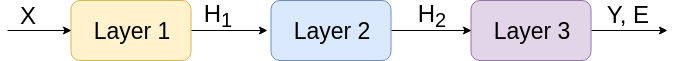 (retreived from: https://miro.medium.com/max/1352/1*ddDKxWSAYci2dHaG3O_DOg.png)


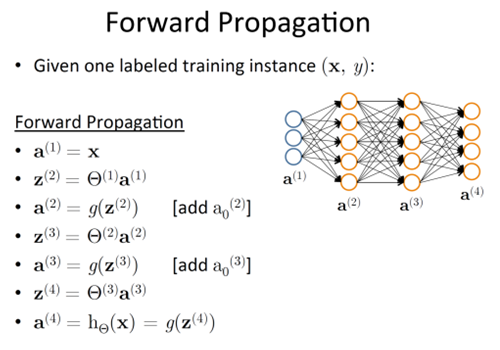

In [34]:
def forward(X, model):
  
  """Performs forward propagation on the model and computes the output

    Arguments
    ---------
    X: input data
    model: List containing the network layers

    Returns
    -------
    Model: List containing layers with updated 'Z' (node value) and 'A' (node value after activation function applied)
  """

  for i in range(len(model)):

    if i==0:
      X_l_1 = X.copy()
    else:
      X_l_1 = model[i-1].A

    model[i].Z = np.dot(X_l_1, model[i].W) + model[i].b
    model[i].A = get_activation_function(model[i].activation)(model[i].Z)
    
  return model

## Backward Propagation

- When the predicted output is compared with the true label, we can evaluate the network performance by computing the **loss** of the network.
- Then we determine the proportion of the losses that may be attributed to each model parameter. This process goes from the losses of the predicted output backward to the original inputs.
- Because there are many parameters in a network, we can compute the gradients (or partial derivatives) of all the weights using the chain rules of derivatives.
- Specifically, the total error is essentially broken up and distributed back through the network to every single weight with the help of chain rule:

$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y}.\frac{\partial y}{\partial x}$$

- This process is referred to as **back propagation**: moving back through the network, back-propagating the total errors to every single weight, and updating the weights.
- The principle of weights-updating: the larger the gradient, the more the adjustments.

$$W_1 = W_1 - \eta \frac{\partial E}{\partial W_1}$$

- The above adjustment formula suggests that the weight updates are proportional to the partial derivatives of the weight. 
- The **$\eta$** in the formula controls the amount of adjustment, which is referred to as the **learning rate**.


**Diagram for backward propagation**
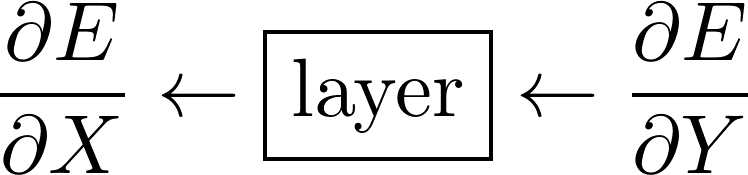 (retreived from: https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65)

In [35]:
def back(X, y, model):

  """Performs forward propagation

    Arguments
    ---------
    X: input Data
    y: True y labels
    modelList containing the layers of the network

    Returns
    -------
    model: List containing the layers with computed 'dw' and 'db'
  """

  m = X.shape[0]

  for i in range(len(model)-1, -1, -1):

    if i==len(model)-1:
      model[i].dz = model[-1].A - y
      model[i].dw = 1./m * np.dot(model[i-1].A.T, model[i].dz) #derivative with respect to weights
      model[i].db = 1./m * np.sum(model[i].dz, axis=0, keepdims=True) #derivative with respect to bias

      model[i-1].da = np.dot(model[i].dz, model[i].W.T) #derivative with respect to activation

    else:

      model[i].dz = np.multiply(np.int64(model[i].A>0), model[i].da) * get_derivative_activation_function(model[i].activation)(model[i].Z) #derivative of z (x)

      if i!=0:
        model[i].dw = 1./m * np.dot(model[i-1].A.T, model[i].dz)
      else:
        model[i].dw = 1./m * np.dot(X.T, model[i].dz)
      model[i].db = 1./m * np.sum(model[i].dz, axis=0, keepdims=True)
      if i!=0:
        model[i-1].da = np.dot(model[i].dz, model[i].W.T)

  return model

## Randomly initialize the weights

In [36]:
def init_weights(n_l_1, n_l, random_state=0):

  """Initializes random weights and bias for a layer l

    Arguments
    ---------
    n_l_1:Number of neurons in previous layer (l-1)
    n_l_1:Number of neurons in current layer (l)
    random_state: Random seed

    Returns
    -------
    dict
      Contains the randomly initialized weights and bias arrays

      The keys for weights and bias arrays in the dict are 'W1', 'b1', 'W2' and 'b2'
  """

  np.random.seed(random_state)

  wl = np.random.randn(n_l_1, n_l) * np.sqrt(2/n_l_1)
  bl = np.random.randn(1, n_l) * np.sqrt(2/n_l_1)

  return {'wl': wl, 'bl': bl}

## Update weights and bias parameters

In [37]:
def update_weights(model, learning_rate=0.01):

  """Updates weights and bias parameters of the layers

    Arguments
    ---------
    model: List containing the network layers
    learning_rate: Learning rate for the weight and bias parameter updates. Default is 0.01
    
    Returns
    -------
    model:List containing the network layers with updated weights and biases
  """

  for i in range(len(model)):
    model[i].W -= learning_rate*model[i].dw #update weights
    model[i].b -= learning_rate*model[i].db #update bias
    
  return model

## Creating fully connected layer class


Fully connected layers are seen as the most basic types of layers since every input neuron is connected to every output neuron. 

In [38]:
class Layers:
  """Returns a fully connected layer with randomly initialized weights and bias values

    Arguments
    ---------
    in_neurons: dimensions of input data (int), i.e. number of neurons in the prev network layer
    neurons: The number of neurons in the current layer
    activation: Activation function to be used. For this notebook I will only allow 'relu', 'tanh' or 'sigmoid'. More can be added

    Returns
    -------
      An instance of the fully connected layer initialized with random weights and biases.
  """

  def __init__(self, in_neurons, neurons, activation, random_state=0):

    params = init_weights(in_neurons, neurons, random_state)

    self.units = neurons
    self.W = params['wl']
    self.b = params['bl']
    self.activation = activation
    self.Z = None
    self.A = None
    self.dz = None
    self.da = None
    self.dw = None
    self.db = None
   

## Class for implementing Activation Function

- In neural network, the activation function of a node determines whether the node would activate the output given the **weighted sum of the input values**. 

- Different types of activation functions may determine the cut-offs for output activation in different ways.

- The choice of activation function has a large impact on the capability and performance of the neural network, and different activation functions may be used in different parts of the model.

- All hidden layers typically use the same activation function. The output layer will typically use a different activation function from the hidden layers and is dependent upon the type of prediction required by the model.



### Different activation functions:

 **Sigmoid** function: This function converts the $y$ values into values within the range of 0 and 1 (i.e., a probability-like value).

 It is the same function used in the logistic regression classification algorithm. It is typically utilized in the output layer, especially when dealing with binary classification

$$ h(y) = \frac{1}{1 + \exp(-y)}$$





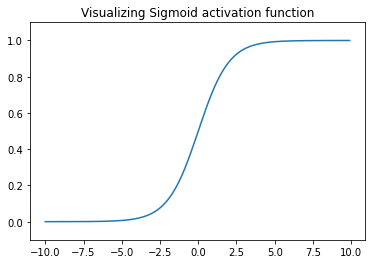

In [39]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


##plotting sigmoid function
x = np.arange(-10.0, 10.0, 0.1)
plt.plot(x, sigmoid(x))
plt.ylim(-0.1, 1.1)
plt.title('Visualizing Sigmoid activation function')
plt.show();

 **Step** function: This function converts the $y$ values into binary ones, with only the positive values activated.

$$ h(y)= \left\{ 
     \begin{array}\\
     0 & (y \leq 0) \\
     1 & (y > 0)
     \end{array}
\right.
$$

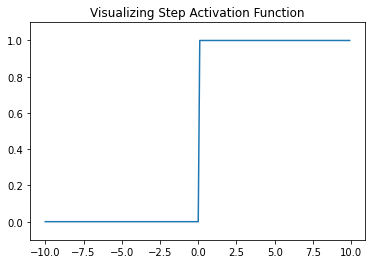

In [40]:
def step_function(x):
    y = x > 0
    return y.astype(int)

#plotting step function
plt.plot(x, step_function(x))
plt.ylim(-0.1, 1.1)
plt.title('Visualizing Step Activation Function')
plt.show();

**ReLU** (Rectified Linear Unit) function: This function converts the $y$ values by passing only positive values and zero for negative $y$.

ReLU activation function is perhaps the most common function used for hidden layers.

It is both simple to implement and effective at overcoming the limitations of other previously popular activation functions, such as Sigmoid and Tanh. Specifically, it is less susceptible to vanishing gradients that prevent deep models from being trained, although it can suffer from other problems like saturated or “dead” units.

$$ h(y)= \left\{ 
     \begin{array}\\
     y & (y > 0) \\
     0 & (y \leq 0)
     \end{array}
\right.
$$

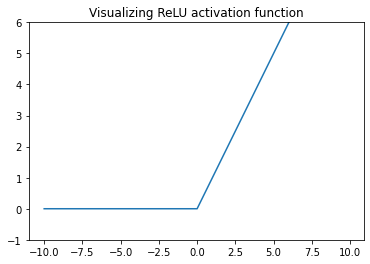

In [41]:
def relu(x):
    return np.maximum(0, x)

#Plotting ReLU function
plt.plot(x, relu(x))
plt.ylim(-1, 6)
plt.title('Visualizing ReLU activation function')
plt.show();

The hyperbolic tangent activation function is also referred to simply as the Tanh (also “tanh” and “TanH“) function.

It is very similar to the sigmoid activation function.The function takes any real value as input and outputs values in the range -1 to 1. The formula is as follows:

$$ h(x) = (e^x – e^-x) / (e^x + e^-x)$$

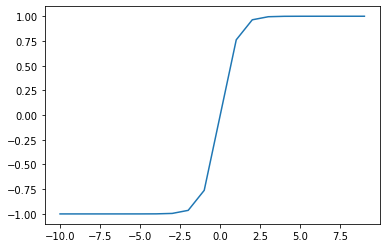

In [42]:
from math import exp
# tanh activation function
def tanh(x):
	return (exp(x) - exp(-x)) / (exp(x) + exp(-x))
 
inputs = [x for x in range(-10, 10)]
# calculate outputs
outputs = [tanh(x) for x in inputs]
# plot inputs vs outputs
plt.plot(inputs, outputs)
plt.show()

Leaky Relu is a variant of ReLU. Instead of being 0 when z<0, a leaky ReLU allows a small, non-zero, constant gradient α (normally, α=0.01). 
$$ h(y)= \left\{ 
     \begin{array}\\
     y & (y > 0) \\
     0.01*y & (y \leq 0)
     \end{array}
\right.
$$

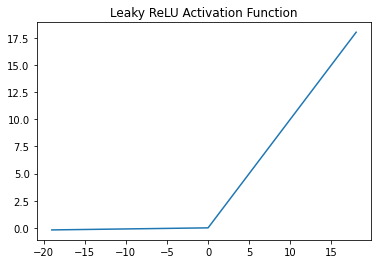

In [43]:

def Leaky_ReLU(x, alpha=0.01):
  return np.where(x > 0, x, x * alpha)

 
# plot Leaky ReLU function
X = [x for x in range(-19, 19)]

x_l_ReLU = [Leaky_ReLU(x) for x in X]
# line plot of raw inputs to rectified outputs
plt.title('Leaky ReLU Activation Function')
plt.plot(X, x_l_ReLU)
plt.show()

It is very similar to the ReLU plot but if you look carefully, the negative values are not zero and there is a slight slope to the line on the left side of the plot.

In [44]:
def get_activation_function(name):

  """Returns the function corresponding to given activation name

    Arguments
    ---------
    name: name of activation function
      Can be either 'relu', 'leaky relu' or 'sigmoid' activation

    Returns
    -------
    Requested activation function
  """

  if name=='relu':
    return relu
  elif name=='sigmoid':
    return sigmoid
  elif name=='leaky_relu':
    return Leaky_ReLU
  else:
    raise ValueError('Only "relu", "leaky_relu", and "sigmoid" supported')

In [45]:
def get_derivative_activation_function(name):

  """Returns differentiation function for specified activation name

  Arguments
  ---------
  name: name of activation function for which differentiation function is needed
    Can only be 'relu', 'leaky relu' or 'sigmoid' activation

  Returns
  -------
   differentiation of specified activation function
  """

  if name=='relu':
    return relu_der
  elif name=='sigmoid':
    return sigmoid_der
  elif name=='leaky_relu':
    return leaky_relu_der
  else:
    raise ValueError('Only the "relu", "leaky_relu", and "sigmoid" activation functions are currently supported')

The activation functions utilized in this notebook will be the ReLU, leaky ReLU, and sigmoid functions. We thus need not only the activation function itself, but also its derivative

In [46]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_der(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

In [47]:
def relu(x):
    return np.maximum(0, x)
def relu_der(x):
    return np.array(x >= 0).astype('int')

In [92]:
def Leaky_ReLU(x, alpha=0.01):
  return np.where(x > 0, x, x * alpha)

def leaky_relu_der(x, alpha=0.01):
  dx = np.ones_like(x)
  dx[x < 0] = alpha
  return dx

## Loss Function



The loss function is utilized to compute the error of the neural network. 

You get numerous loss functions, e.g.
- Mean Square Error: This loss function is typically utilized when our target/ outputs are numeric values, e.g. height or housing price
- Cross Entropy Error: This loss function is utilized for target variables/outputs which are categorical labels, e.g. classifying different crop types.

Since my data has a target variable which is categorical (label) in nature, I will utilized the cross entropy error.

**Equation for Cross-entropy loss function**
\begin{equation} H(p,q)=-\sum _{x}p(x)\,\log q(x) \end{equation}

where p(x) is the target label and q(x) is the predicted label for a given observation.


In [49]:
def loss_function(y, model):

  """Calculate the cross-entropy loss of the neural network

    Arguments
    --------- 
    y: True y values
    model: list containing network layers


    Returns
    -------
    loss: Entropy loss
  """

  m = y.shape[0]
  A = model[-1].A

  return np.squeeze(-(1./m)*np.sum(np.multiply(y, np.log(A))+np.multiply(np.log(1-A), 1-y))) 

### Prediction function which allows a prediction to be made based on the input

In [50]:
def predict(X, y, model):
    
  """Using the learned parameters, predicts a class for each example in X
  
  Arguments
  ---------
  X: array_like
    Data
  y: array_like
    True Labels
  model: list
    List containing the layers
  
  Returns
  -------
  predictions: array_like
    Vector of predictions of our model
  """
  
  model1 = forward(X, model.copy())
  predictions = np.where(model1[-1].A > 0.5, 1, 0)
  
  return predictions

## Implementing neural network using classes and functions above

### Import data to be utilized

The data is two h5 files (one train and one test) of cats and other objects. One would like to build a model which classifies whether an image provided is a cat or not.

It is binary categorical as the y output value is either a one or zero depending on whether it is a cat (1) or not (0).



In [51]:
def load_dataset():

  """Loads the Cat vs Non-Cat dataset

    Returns
    -------
    X_train, y_train, X_test, y_test, classes: Arrays
      Dataset splitted into train and test with classes
  """
  
  train_dataset = h5py.File('train_catvnoncat.h5', "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:])
  train_set_y_orig = np.array(train_dataset["train_set_y"][:])

  test_dataset = h5py.File('test_catvnoncat.h5', "r")
  test_set_x_orig = np.array(test_dataset["test_set_x"][:])
  test_set_y_orig = np.array(test_dataset["test_set_y"][:])

  classes = np.array(test_dataset["list_classes"][:])
  
  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

Split data into test and train sets

In [52]:
X_train, y_train, X_test, y_test, classes = load_dataset()

### Visualizing data

In [53]:
train_dataset = h5py.File('train_catvnoncat.h5', "r")

In [54]:
print(train_dataset.keys())

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>


In [55]:
images_train = train_dataset['train_set_x']
print(images_train.shape)

(209, 64, 64, 3)


Thus in the train dataset there are 209 images, and the size of the image is 64*64. 

### Displaying the first 12 images of train dataset

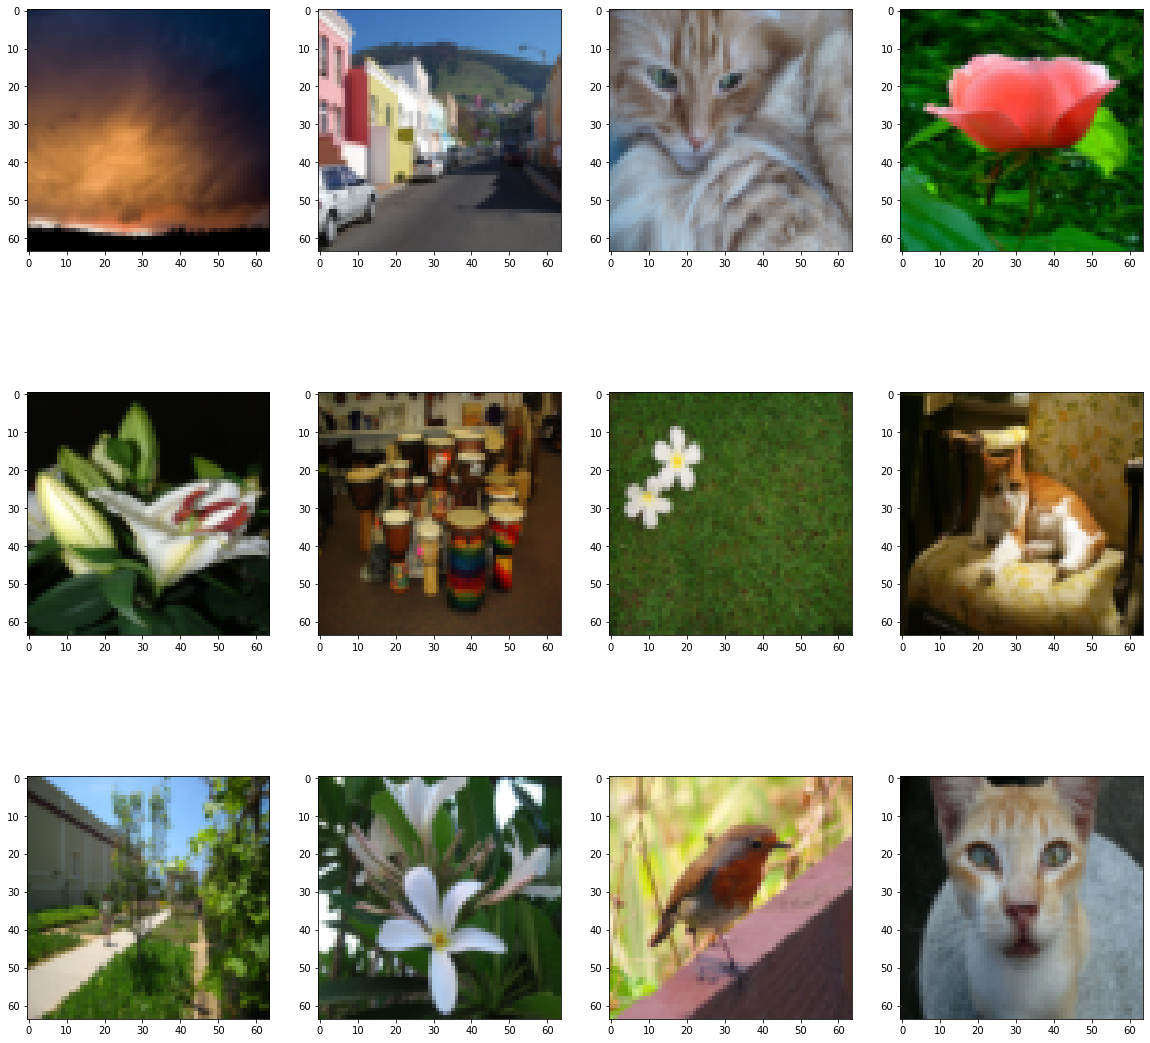

In [56]:
plt.subplots(3,4,figsize = (20,20))

for i in range(12):
    img_np = images_train[i]
    plt.subplot(3,4,1+i)
    plt.imshow(img_np)
plt.show()


Reshape data to be able to be fed into model

In [57]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(209, 64, 64, 3)
(209, 1)
(50, 64, 64, 3)
(50, 1)


In [58]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [59]:
X_train = X_train/255.
X_test = X_test/255.

# Model 1
## Model with ReLU and Sigmoid Activation functions with 3 hidden layers

A neural network will almost always have the same activation function in all hidden layers.

It is most unusual to vary the activation function through a network model. Thus, ReLU is used in all hidden layers in this model. It is also the post popular activation function utilized for hidden layers in Multi-Layer Perceptron (MLP) and CNNs.

The sigmoid function can make the model more susceptible to problems during training, via the so-called vanishing gradients problem if used as activations in the hidden layers and is thus is only utilized for the output layer. This is due to this being a binary classification problem, which sigmoid is ideal for.


Model one has one input layer, three hidden layers, and one output layer

Activation function for hidden layers is relu, and for the output layer it is sigmoid

In [60]:
random_state = 42
epochs = 2000

model = []
model.append(Layers(in_neurons = X_train.shape[1], neurons=20, activation='relu', random_state=random_state))
model.append(Layers(in_neurons= 20, neurons=16, activation='relu', random_state=random_state))
model.append(Layers(in_neurons = 16, neurons=8, activation='relu', random_state=random_state))
model.append(Layers(in_neurons = 8, neurons=4, activation='relu', random_state=random_state))
model.append(Layers(in_neurons = 4, neurons=y_train.shape[1], activation='sigmoid', random_state=random_state))

In [83]:
Train_acc = []
Test_acc = []
loss_ = []

for i in range(epochs):
  model = forward(X_train, model)
  loss = loss_function(y_train, model)
  model = back(X_train, y_train, model)
  model = update_weights(model, 5e-3)
  Train_acc.append(accuracy_score(y_train, predict(X_train, y_train, model)))
  loss_.append(loss)
  Test_acc.append(accuracy_score(y_test, predict(X_test, y_test, model))) 



  if i%(epochs/10)==0: 
    print('Epoch: {}\tLoss: {:.6f}\tTrain Accuracy: {:.3f}\tTest Accuracy: {:.3f}'.format(i, loss, accuracy_score(y_train, predict(X_train, y_train, model)), accuracy_score(y_test, predict(X_test, y_test, model))))

history = {'epochs': epochs,
            'train_acc': Train_acc,
            'loss': loss_,
            'test_acc': Test_acc
            }

Epoch: 0	Loss: 0.586991	Train Accuracy: 0.660	Test Accuracy: 0.480
Epoch: 200	Loss: 0.471851	Train Accuracy: 0.794	Test Accuracy: 0.680
Epoch: 400	Loss: 0.383174	Train Accuracy: 0.789	Test Accuracy: 0.520
Epoch: 600	Loss: 0.295667	Train Accuracy: 0.847	Test Accuracy: 0.560
Epoch: 800	Loss: 0.192189	Train Accuracy: 0.938	Test Accuracy: 0.660
Epoch: 1000	Loss: 0.107856	Train Accuracy: 0.990	Test Accuracy: 0.800
Epoch: 1200	Loss: 0.084305	Train Accuracy: 0.995	Test Accuracy: 0.760
Epoch: 1400	Loss: 0.074012	Train Accuracy: 0.995	Test Accuracy: 0.760
Epoch: 1600	Loss: 0.067614	Train Accuracy: 0.995	Test Accuracy: 0.760
Epoch: 1800	Loss: 0.063376	Train Accuracy: 0.995	Test Accuracy: 0.760


This model performs very well with a train accuracy of 99.5% and a test accuracy of 76%

## Plot train and test accuracy, and loss for Model 1

In [85]:
def plot_history(history):
    n = history['epochs']
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    n = 2000
    plt.plot(range(history['epochs'])[:n], history['loss'][:n], label='loss')
    plt.title('loss')
    plt.grid(1)
    plt.xlabel('epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(history['epochs'])[:n], history['train_acc'][:n], label='train_acc')
    plt.plot(range(history['epochs'])[:n], history['test_acc'][:n], label='test_acc')
    plt.title('train & test accuracy')
    plt.grid(1)
    plt.xlabel('epochs')
    plt.legend()

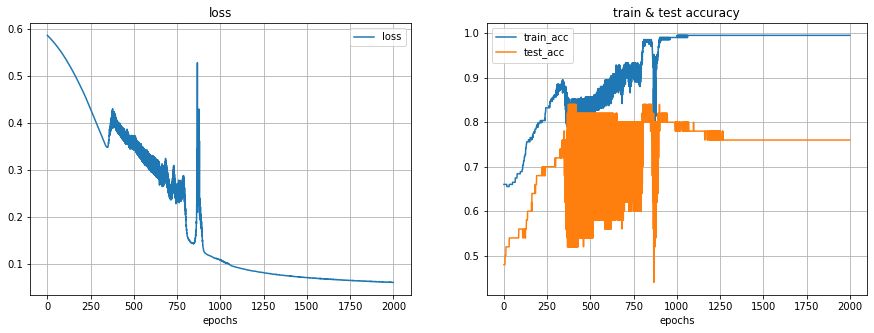

In [86]:
plot_history(history)

# Model 2
## Model with leaky ReLU and Sigmoid Activation functions with 4 hidden layers

The ReLU does have some limitations.

Key among the limitations of ReLU is the case where large weight updates can mean that the summed input to the activation function is always negative, regardless of the input to the network.

Some popular extensions to the ReLU relax the non-linear output of the function to allow small negative values in some way. For example, the Leaky ReLU modifies the function to allow small negative values when the input is less than zero. 

Thus, in model 2 the relu activation function is replaced with leaky relu to see if it may improve model performance.

Another hidden layer is added merely to observe the effects of the number of hidden layers within a network.

In [93]:
random_state = 43
epochs = 2000

model2 = []
model2.append(Layers(in_neurons = X_train.shape[1], neurons=20, activation='leaky_relu', random_state=random_state))
model2.append(Layers(in_neurons= 20, neurons=16, activation='leaky_relu', random_state=random_state))
model2.append(Layers(in_neurons = 16, neurons=8, activation='leaky_relu', random_state=random_state))
model2.append(Layers(in_neurons = 8, neurons=4, activation='leaky_relu', random_state=random_state))
model2.append(Layers(in_neurons = 4, neurons=2, activation='leaky_relu', random_state=random_state))
model2.append(Layers(in_neurons = 2, neurons=y_train.shape[1], activation='sigmoid', random_state=random_state))

In [97]:
train_acc2 = []
test_acc2 = []
loss2_ = []
for i in range(epochs):
  model2 = forward(X_train, model2)
  loss2 = loss_function(y_train, model2)
  model2 = back(X_train, y_train, model2)
  model2 = update_weights(model2, 5e-3)
  train_acc2.append(accuracy_score(y_train, predict(X_train, y_train, model2)))
  test_acc2.append(accuracy_score(y_test, predict(X_test, y_test, model2)))
  loss2_.append(loss2)

  if i%(epochs/10)==0:
    print('Epoch: {}\tLoss: {:.6f}\tTrain Accuracy: {:.3f}\tTest Accuracy: {:.3f}'.format(i, loss2, accuracy_score(y_train, predict(X_train, y_train, model2)), accuracy_score(y_test, predict(X_test, y_test, model2))))

Epoch: 0	Loss: 0.004973	Train Accuracy: 1.000	Test Accuracy: 0.700
Epoch: 200	Loss: 0.004012	Train Accuracy: 1.000	Test Accuracy: 0.700
Epoch: 400	Loss: 0.003332	Train Accuracy: 1.000	Test Accuracy: 0.700
Epoch: 600	Loss: 0.002837	Train Accuracy: 1.000	Test Accuracy: 0.720
Epoch: 800	Loss: 0.002459	Train Accuracy: 1.000	Test Accuracy: 0.720
Epoch: 1000	Loss: 0.002161	Train Accuracy: 1.000	Test Accuracy: 0.720
Epoch: 1200	Loss: 0.001923	Train Accuracy: 1.000	Test Accuracy: 0.720
Epoch: 1400	Loss: 0.001728	Train Accuracy: 1.000	Test Accuracy: 0.720
Epoch: 1600	Loss: 0.001565	Train Accuracy: 1.000	Test Accuracy: 0.720
Epoch: 1800	Loss: 0.001430	Train Accuracy: 1.000	Test Accuracy: 0.720


There appears to be possible overfitting occuring in this model, with a training accuracy of 100% and a test accuracy of 70%. It could be due to the activation function or number of hidden layers used. 

In [98]:
history2 = {'epochs': epochs,
            'train_acc': train_acc2,
            'loss': loss2_,
            'test_acc': test_acc2
            }

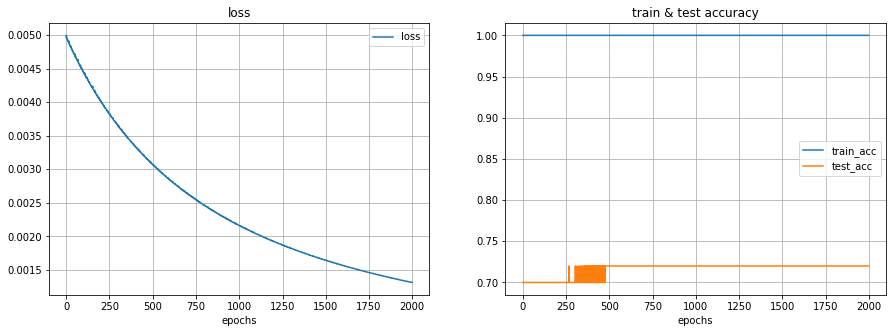

In [99]:
plot_history(history2)

This model is worse than the first one due to the overfitting of the model, and a lower test accuracy score